In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import  pyplot as plt

In [2]:
data= data= pd.read_csv('sep19SexAndAgeAddedFINAL DATASET_ver2.txt',sep=',')


In [3]:

data['FIELD_6_7']=np.min(data[['FIELD_6','FIELD_7']],axis=1) #combine FIELD_6 and FIELD_7 both represent the same thing (Women's marital status)
data=data.drop(columns=['FIELD_6','FIELD_7','B_DAY'])
print(data.shape)
# filter the data set 
data=data[data.FIELD_16!=1] # exclude people who are diagnosed for (diabetes) 
data=data[data.FIELD_23!=1] # exclude people who are on medication for diabetes

data=data[data.FIELD_15!=1] # exclude people who are diagnosed for (high blood pressure)
data=data[data.FIELD_22!=1] # exclude people who are on medication for high blood pressure

data=data[data.FIELD_17!=1] # exclude people who are diagnosed for hyperlipidemia
data=data[data.FIELD_24!=1] # exclude people who are on medication for hyperlipidemia
print(data.shape)

(535169, 404)
(466680, 404)


In [4]:
data.groupby(by='SEX').size()

SEX
0.0    259834
1.0    206845
dtype: int64

In [5]:
data.FIELD_1.unique().shape

(253395,)

(array([1.1000e+01, 5.2000e+01, 6.9700e+02, 1.4400e+03, 3.0360e+03,
        7.9530e+03, 1.6309e+04, 2.3600e+04, 1.4406e+04, 3.0937e+04,
        3.4560e+04, 3.5946e+04, 3.3897e+04, 3.3436e+04, 3.3439e+04,
        3.3673e+04, 1.5890e+04, 2.9053e+04, 2.4111e+04, 2.0071e+04,
        1.7322e+04, 1.5006e+04, 1.2232e+04, 9.4250e+03, 3.7610e+03,
        5.1790e+03, 3.7150e+03, 2.4970e+03, 1.7070e+03, 1.1850e+03,
        7.6700e+02, 5.1700e+02, 3.2300e+02, 1.2100e+02, 1.8100e+02,
        7.9000e+01, 4.9000e+01, 2.1000e+01, 2.0000e+01, 7.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 1.3000e+01, 1.5000e+01, 1.1000e+01]),
 array([ 14.  ,  15.88,  17.76,  19.64,  21.52,  23.4 ,  25.28,  27.16,
         29.04,  30.92,  32.8 ,  34.68,  36.56,  38.44,  40.32,  42.2 ,
         44.08,  45.96,  47.84,  49.72,  51.6 ,  53.48,  55.36,  57.24,
         59.12,  61.  ,  62.88,  64.76,  66.64,  68.52,  70.4 ,  72.28,
         74.16,  76.04,  77.92

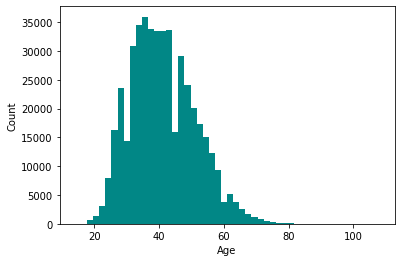

In [6]:
temp=data.sort_values(by='AGE').AGE

# plt.scatter(np.arange(0,temp.shape[0]),temp.AGE)
plt.ylabel('Count')
plt.xlabel('Age')
plt.hist(temp,bins=50, color='#018786')

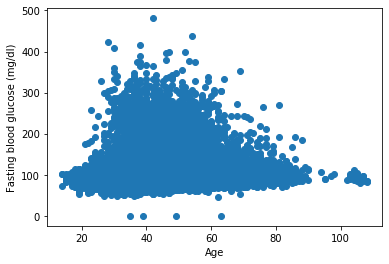

In [7]:
plt.scatter(data.AGE,data.L100800)
plt.xlabel('Age')
plt.ylabel('Fasting blood glucose (mg/dl)')
plt.show()

In [8]:
data.groupby(by='SEX').size()

SEX
0.0    259834
1.0    206845
dtype: int64

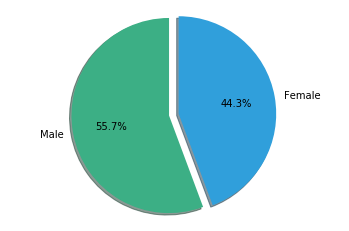

In [9]:
labels = 'Male', 'Female' 
sizes = [259834, 206845]
explode = (0, 0.1,)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=['#3CAF85','#309FDB','#A6192E'],
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [29]:
# add Diabetic Class to the dataset 
conditions = [
    (data.L100800 < 100)  ,
    (data.L100800 >= 100) & (data.L100800 < 126),
    (data.L100800 >= 126)]
choices = [0,1,2]
data['DiabeticCLASS'] = np.select(conditions, choices, default=0) 

In [30]:
data.groupby(by='DiabeticCLASS').size()

DiabeticCLASS
0    371254
1    142908
2     21007
dtype: int64

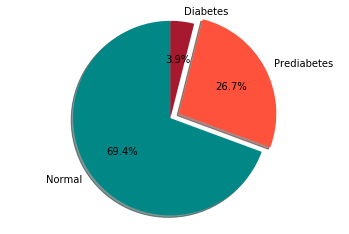

In [10]:
labels = 'Normal', 'Prediabetes', 'Diabetes'
sizes = [371254, 142908, 21007]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=['#018786','#FF523D','#A6192E'],
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [34]:
data[['L104600', 'L103000', 'S000300',  'L101700', 'SEX', 'AGE', 'L100700', 
               'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_31','DiabeticCLASS']].dropna().groupby(by='DiabeticCLASS').size()

DiabeticCLASS
0    113021
1     45847
2      7138
dtype: int64

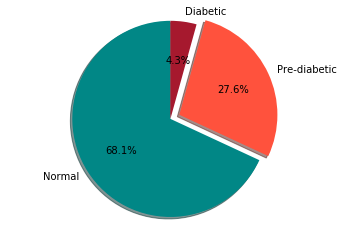

In [13]:
labels = 'Normal', 'Pre-diabetic', 'Diabetic'
sizes = [113021, 45847, 7138]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=['#018786','#FF523D','#A6192E'],
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Customer Info Analaysis
========

In [32]:
print(data.shape)
data.head(5)

(466680, 404)


,Unnamed: 0,FIELD_1,FIELD_2,COMPARE,AGE,SEX,FIELD_3,FIELD_4,FIELD_5,FIELD_8,...,S004424,S005200,S007400,S008501,S008502,S008503,S008504,S010101,S010102,FIELD_6_7
0,0,1000003,20130913,100000320130913,46.0,0.0,NaN,4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0,NaN
1,1,1000003,20140613,100000320140613,47.0,0.0,NaN,4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,16.0,NaN
2,2,1000003,20150917,100000320150917,48.0,0.0,1,4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,NaN
3,3,1000003,20160617,100000320160617,49.0,0.0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,18.0,NaN
4,4,1000003,20170608,100000320170608,50.0,0.0,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,18.0,NaN


In [33]:
print(np.mean(data.AGE))
print(np.std(data.AGE))

41.1761746296705
9.953639592014229


In [34]:
# unique Customers
print(np.unique(data.FIELD_1).shape)

(253395,)


In [35]:
# the number of times the customer show up to the hospital
groupedCustomer=data.groupby(by=['FIELD_1']).size().reset_index(name='Freq')
groupedCustomer.head() 
# np.unique(groupedCustomer.Freq)

,FIELD_1,Freq
0,37,1
1,64,4
2,104,1
3,105,2
4,323,4


In [9]:
# grouped customer list 
groupedCustomerSecondLevel=groupedCustomer.groupby(by=['Freq']).size().reset_index(name='Count')
groupedCustomerSecondLevel.head(10) 

,Freq,Count
0,1,146787
1,2,49574
2,3,26970
3,4,14238
4,5,12600
5,6,2910
6,7,178
7,8,77
8,9,49
9,10,12


In [10]:
np.sum(groupedCustomerSecondLevel.Count)

253395

In [8]:
# customers who show up more than or equal to two times 

peoplewhoshowupG1=groupedCustomer[groupedCustomer.Freq>=2]
print(peoplewhoshowupG1.shape)
peoplewhoshowupG1.head()

(121956, 2)


,CustomerID,Freq
1,64,4
3,105,2
4,323,4
9,761,2
10,782,2


In [9]:
uniqueID=np.unique(peoplewhoshowupG1.CustomerID)
uniqueID= pd.DataFrame(uniqueID,columns=['CustomerID'])
print(uniqueID.shape)
uniqueID.head()

(121956, 1)


,CustomerID
0,64
1,105
2,323
3,761
4,782


In [27]:
# Add year column
customer2=customer.copy()
customer2["Year"] = ((customer['TestDate']/10000)).astype(int)
customer2.head()

customer2=pd.merge( uniqueID, customer2, how='inner', left_on='CustomerID', right_on='CustomerID' )
print(customer2.shape)

customer2=customer2.groupby(["CustomerID",'Year']).size().reset_index(name='Count')
customer2=customer2.sort_values(by=["CustomerID"])

customer2GroupedByYear=customer2.copy()
customer2GroupedByYear=customer2GroupedByYear.sort_values(by=["CustomerID","Year"])
customer2GroupedByYear.head()

(372494, 5)


,CustomerID,Year,Count
0,64,2013,1
1,64,2014,1
2,64,2015,1
3,64,2016,1
4,105,2013,1


In [29]:
pivotedData=[]

previousID=0
previousyear=0
years=''
for i in range(customer2GroupedByYear.shape[0]):
    
    if(previousID==np.asarray(customer2GroupedByYear)[i,0]):
        previousID=np.asarray(customer2GroupedByYear)[i,0]
        previousyear=np.asarray(customer2GroupedByYear)[i,1]
        years+=str(previousyear)+','
    else:
        pivotedData.append([previousID,years])
        previousID=np.asarray(customer2GroupedByYear)[i,0]
        years=str(np.asarray(customer2GroupedByYear)[i,1])+','
pivotedData.append([previousID,years])  
del pivotedData[0]

In [31]:
len(pivotedData)
pivotedData=pd.DataFrame(pivotedData,columns=['CustomerID', 'Years'])
pivotedData.head()

,CustomerID,Years
0,64,"2013,2014,2015,2016,"
1,105,"2013,2015,"
2,323,"2013,2014,2015,2016,"
3,761,"2013,2014,"
4,782,"2013,2014,"


In [32]:
# get the count of the continuous years for each customer

customerContiniousApp=[]

for i in range(pivotedData.shape[0]):
    
    temp=  (pivotedData['Years'][i])[:-1]
    temp=(temp.split(','))
    temp=[int(v) for v in temp] 
    
#     print(temp)
#     print(pivotedData['CustomerID'][i],temp)
    
    yearcount=0
    
    minyear=temp[0]
    maxyear=temp[0]
    
    tempcount=[]
    
     
    for j in range(len(temp)):
        
        if(temp[j]-maxyear>1):
            minyear=temp[j]
            maxyear=temp[j]
            tempcount.append(yearcount)
            yearcount=0
            
        elif(temp[j]-maxyear==1):
            yearcount+=1            
            maxyear=temp[j]
            
    tempcount.append(yearcount)
    
    maxcount=max(tempcount)
    if(maxcount>0):
        maxcount+=1
            
#     print(maxcount)
    customerContiniousApp.append([pivotedData['CustomerID'][i],maxcount])

# customerContiniousApp
            
        
 

In [34]:
customerContiniousApp=pd.DataFrame(customerContiniousApp,columns=['CustomerID', 'AppYearCount'])
customerContiniousApp.head(5)

,CustomerID,AppYearCount
0,64,4
1,105,0
2,323,4
3,761,2
4,782,2


In [41]:
customerContiniousAppGrouped=customerContiniousApp.groupby('AppYearCount').size().reset_index(name='Count')
customerContiniousAppGrouped.head(10)

,AppYearCount,Count
0,0,32419
1,2,38485
2,3,21959
3,4,11201
4,5,14100
5,6,3792


In [45]:
# Total number of customers who show up continiously for two or more years 
sum(customerContiniousAppGrouped[customerContiniousAppGrouped.AppYearCount>0].Count)

89537

In [53]:
# update unique ID to customers who show up 2 or more times in a row 
uniqueID=np.unique(customerContiniousApp[customerContiniousApp.AppYearCount>0].CustomerID)
uniqueID= pd.DataFrame(uniqueID,columns=['CustomerID'])
print(uniqueID.shape)
uniqueID.head()

(89537, 1)


,CustomerID
0,64
1,323
2,761
3,782
4,785


Filtering out the diabetic tests only
======

In [54]:
N13DiabeticTest=N13.query(' TestCode== "L1008" ') 
N14DiabeticTest=N14.query(' TestCode== "L1008" ') 
N15DiabeticTest=N15.query(' TestCode== "L1008" ') 
N16DiabeticTest=N16.query(' TestCode== "L1008" ') 
N17DiabeticTest=N17.query(' TestCode== "L1008" ') 
N18DiabeticTest=N18.query(' TestCode== "L1008" ')  

N13UniqueCustomerData= pd.merge(N13DiabeticTest, uniqueID, how='inner', left_on = 'CustomerID', right_on = 'CustomerID')
N14UniqueCustomerData= pd.merge(N14DiabeticTest, uniqueID, how='inner', left_on = 'CustomerID', right_on = 'CustomerID')
N15UniqueCustomerData= pd.merge(N15DiabeticTest, uniqueID, how='inner', left_on = 'CustomerID', right_on = 'CustomerID')
N16UniqueCustomerData= pd.merge(N16DiabeticTest, uniqueID, how='inner', left_on = 'CustomerID', right_on = 'CustomerID')
N17UniqueCustomerData= pd.merge(N17DiabeticTest, uniqueID, how='inner', left_on = 'CustomerID', right_on = 'CustomerID')
N18UniqueCustomerData= pd.merge(N18DiabeticTest, uniqueID, how='inner', left_on = 'CustomerID', right_on = 'CustomerID')


In [55]:
DiabeticTest=pd.concat([N13UniqueCustomerData,
N14UniqueCustomerData,
N15UniqueCustomerData,
N16UniqueCustomerData,
N17UniqueCustomerData,
N18UniqueCustomerData])
DiabeticTest.head()

,CustomerID,TestDate,TestCode,TestSerial,NumericResult
0,1000003,20130913,L1008,0,111.0
1,1000056,20131023,L1008,0,88.0
2,1000068,20130827,L1008,0,113.0
3,1000078,20130629,L1008,0,89.0
4,1000082,20130504,L1008,0,82.0


In [58]:
print(np.unique(DiabeticTest.CustomerID).shape)
print(DiabeticTest.shape)

(89529,)
(300729, 5)


In [59]:
DiabeticTest.head()

,CustomerID,TestDate,TestCode,TestSerial,NumericResult
0,1000003,20130913,L1008,0,111.0
1,1000056,20131023,L1008,0,88.0
2,1000068,20130827,L1008,0,113.0
3,1000078,20130629,L1008,0,89.0
4,1000082,20130504,L1008,0,82.0


In [76]:
DiabeticTestAndDate =DiabeticTest[['CustomerID','TestDate']]
DiabeticTestAndDate["Year"] = ((customer['TestDate']/10000)).astype(int)
print(DiabeticTestAndDate.shape)
DiabeticTestAndDate.head()

(300729, 3)


,CustomerID,TestDate,Year
0,1000003,20130913,2013
1,1000056,20131023,2014
2,1000068,20130827,2015
3,1000078,20130629,2016
4,1000082,20130504,2017


In [79]:
DiabeticTestAndDateGrouped=DiabeticTestAndDate.groupby(by='CustomerID').size().reset_index(name='Count')
print(DiabeticTestAndDateGrouped.shape)
DiabeticTestAndDateGrouped_cG2=DiabeticTestAndDateGrouped[DiabeticTestAndDateGrouped.Count >1]
print(DiabeticTestAndDateGrouped_cG2.shape)
# DiabeticTestAndDateGrouped.head()

(89529, 2)
(89479, 2)


In [87]:
print(np.unique(DiabeticTestAndDateGrouped_cG2.CustomerID).shape)
print(sum(DiabeticTestAndDateGrouped_cG2.Count))
DiabeticTestAndDateGrouped_cG2.head()


(89479,)
300679


,CustomerID,Count
0,64,4
1,323,4
2,761,2
3,782,2
4,785,2


In [99]:
UniqueIDsROI = np.unique(DiabeticTestAndDateGrouped_cG2.CustomerID)
UniqueIDsROI= pd.DataFrame(UniqueIDsROI,columns=['CustomerID'])
print(UniqueIDsROI.shape)
UniqueIDsROI.head()

(89479, 1)


,CustomerID
0,64
1,323
2,761
3,782
4,785


In [88]:
#extract more information about the ROI

# UniqueIDsROI= pd.merge(UniqueIDsROI,customer,how='inner', left_on='CustomerID', right_on='CustomerID')
# UniqueIDsROI.shape

(300880, 4)

In [119]:
customerbasicinfo=customer.copy() 
customerbasicinfo=customerbasicinfo.groupby(by=['CustomerID','BirthDate','Sex']).size().reset_index(name='Freq')
customerbasicinfo= pd.merge(UniqueIDsROI,customerbasicinfo,how='inner', left_on='CustomerID', right_on='CustomerID')

customerbasicinfo["BirthYear"]=((customerbasicinfo["BirthDate"])/10000).astype(int)
customerbasicinfo=customerbasicinfo.sort_values(by=["BirthYear"],ascending=True).reset_index()
customerbasicinfo.loc[:,'BirthYear'][:8] += 2000
customerbasicinfo.loc[:,'BirthYear'][8:] += 1900

customerbasicinfo= pd.merge(pivotedData,customerbasicinfo,how='inner', left_on='CustomerID', right_on='CustomerID')
customerbasicinfo= pd.merge(customerContiniousApp,customerbasicinfo,how='inner', left_on='CustomerID', right_on='CustomerID')
customerbasicinfo["Age"]=( (2019-customerbasicinfo["BirthYear"])).astype(int)

customerbasicinfo=customerbasicinfo.sort_values(by=["Age"],ascending=True).reset_index()
customerbasicinfo = customerbasicinfo.loc[:, ~customerbasicinfo.columns.str.contains('^level')] 
print(customerbasicinfo.shape)
customerbasicinfo.head(10)

(89479, 9)


,CustomerID,AppYearCount,Years,index,BirthDate,Sex,Freq,BirthYear,Age
0,1857443,3,"2013,2014,2015,",57464,111111,M,3,2011,8
1,1307077,2,"2013,2014,",51797,31120,M,2,2003,16
2,1308537,3,"2013,2014,2015,",51799,10323,M,3,2001,18
3,5265376,2,"2017,2018,",88931,10614,M,2,2001,18
4,1308553,2,"2014,2015,",51800,10317,M,2,2001,18
5,1308460,2,"2013,2014,",51798,10428,M,2,2001,18
6,1898994,2,"2013,2014,",57587,817,M,2,2000,19
7,4984608,2,"2016,2017,",86621,317,M,2,2000,19
8,5120013,2,"2017,2018,",88126,990221,M,2,1999,20
9,9636,3,"2013,2014,2015,",13,990828,M,3,1999,20


In [133]:
ROI=customerbasicinfo
baseyear=[]
for i in range(ROI.shape[0]):
    
    temp=(ROI['Years'][i]).split(',' )
    temp=temp[:-1]
    
    if(int(ROI['AppYearCount'][i])==len(temp)):
        baseyear.append((ROI['Years'][i]).split(',' )[0])
        
    else:
        
        if(int(len(temp))== 5):
            if(int(temp[2])==2015):
                baseyear.append(2013)
            else:
                baseyear.append(2016)
                
        else:
            for j in range(len(temp)-1):
                if( ( int(temp[j+1]) - int(temp[j]) ) == 1 ):
                    baseyear.append( int(temp[j]) )
                    break
                    
ROI['BaseYear']=baseyear     
ROI.head()

,CustomerID,AppYearCount,Years,index,BirthDate,Sex,Freq,BirthYear,Age,BaseYear
0,1857443,3,"2013,2014,2015,",57464,111111,M,3,2011,8,2013
1,1307077,2,"2013,2014,",51797,31120,M,2,2003,16,2013
2,1308537,3,"2013,2014,2015,",51799,10323,M,3,2001,18,2013
3,5265376,2,"2017,2018,",88931,10614,M,2,2001,18,2017
4,1308553,2,"2014,2015,",51800,10317,M,2,2001,18,2014


In [136]:
DiabeticTestAndDate.groupby(by=['CustomerID','Year']).size()

CustomerID  Year
64          2014    2
            2015    2
323         2014    2
            2015    1
            2017    1
761         2013    1
            2018    1
782         2014    2
785         2013    1
            2016    1
852         2013    1
            2015    3
            2016    1
981         2014    1
            2016    1
            2018    1
1352        2013    2
            2014    1
1364        2013    2
            2014    1
            2015    1
            2016    1
1938        2013    1
            2014    1
            2016    1
            2017    1
2063        2015    1
            2017    1
2113        2015    2
            2016    2
                   ..
5526243     2016    1
5526259     2015    1
            2017    1
5527524     2014    3
            2016    2
5528601     2015    1
            2016    1
5529756     2013    1
            2018    1
5532611     2015    1
            2016    1
5534268     2013    1
            2014    1
5654226     201